In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

# 用pandas_datereader获取YAHOO finace网站中的的股票信息

In [2]:
alibaba = pdr.get_data_yahoo('BABA')

In [3]:
amazon = pdr.get_data_yahoo('AMZN')

In [4]:
alibaba.to_csv('20181108BABA.csv')
amazon.to_csv('20181108AMZN.csv')

## 查看基本信息

In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2230 entries, 2009-12-31 to 2018-11-07
Data columns (total 6 columns):
High         2230 non-null float64
Low          2230 non-null float64
Open         2230 non-null float64
Close        2230 non-null float64
Volume       2230 non-null int64
Adj Close    2230 non-null float64
dtypes: float64(5), int64(1)
memory usage: 122.0 KB


In [6]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-19,99.699997,89.949997,92.699997,93.889999,271879400,93.889999
2014-09-22,92.949997,89.500000,92.699997,89.889999,66657800,89.889999
2014-09-23,90.480003,86.620003,88.940002,87.169998,39009800,87.169998
2014-09-24,90.570000,87.220001,88.470001,90.570000,32088000,90.570000
2014-09-25,91.500000,88.500000,91.089996,88.919998,28598000,88.919998


In [7]:
amazon.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000


## 截取自2014/09/19起的股票数据

In [8]:
amazon2014 = amazon.loc['2014-09-19':]

In [9]:
amazon2014.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-19,332.760010,325.570007,327.600006,331.320007,6886200,331.320007
2014-09-22,329.489990,321.059998,328.489990,324.500000,3109700,324.500000
2014-09-23,327.600006,321.250000,322.459991,323.630005,2352600,323.630005
2014-09-24,329.440002,319.559998,324.170013,328.209991,2642200,328.209991
2014-09-25,328.540009,321.399994,327.989990,321.929993,2928800,321.929993


## 简单绘图
* 每日收盘价

Text(0.5,1,'Adj_Close')

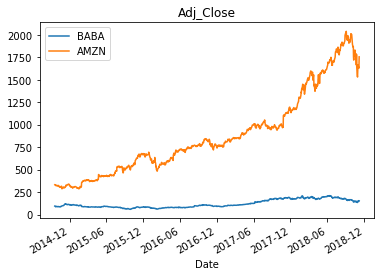

In [10]:
alibaba['Adj Close'].plot(label='BABA',legend=True)
amazon2014['Adj Close'].plot(label='AMZN')
plt.legend()
plt.title('Adj_Close')

## 当日股价波动

In [11]:
amazon2014['High-Low'] = amazon2014['High']-amazon2014['Low']
alibaba['High-Low'] = alibaba['High']-alibaba['Low']

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
amazon2014.head()

,High,Low,Open,Close,Volume,Adj Close,High-Low
Date,,,,,,,
2014-09-19,332.760010,325.570007,327.600006,331.320007,6886200,331.320007,7.190002
2014-09-22,329.489990,321.059998,328.489990,324.500000,3109700,324.500000,8.429993
2014-09-23,327.600006,321.250000,322.459991,323.630005,2352600,323.630005,6.350006
2014-09-24,329.440002,319.559998,324.170013,328.209991,2642200,328.209991,9.880005
2014-09-25,328.540009,321.399994,327.989990,321.929993,2928800,321.929993,7.140015


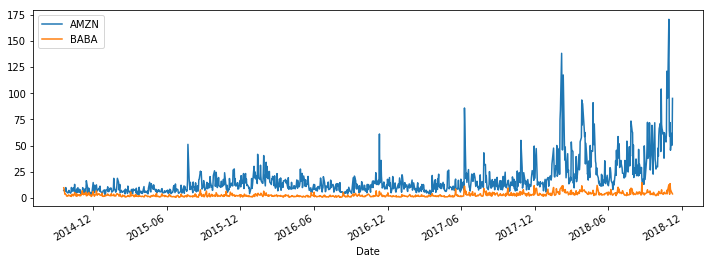

In [13]:
plt.figure(figsize=(12,4))
amazon2014['High-Low'].plot(label='AMZN')
alibaba['High-Low'].plot(label='BABA')
plt.legend()

## 股价daily return

In [14]:
amazon2014['daily_return'] = amazon2014['Adj Close'].pct_change()
alibaba['daily_return'] = alibaba['Adj Close'].pct_change()

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


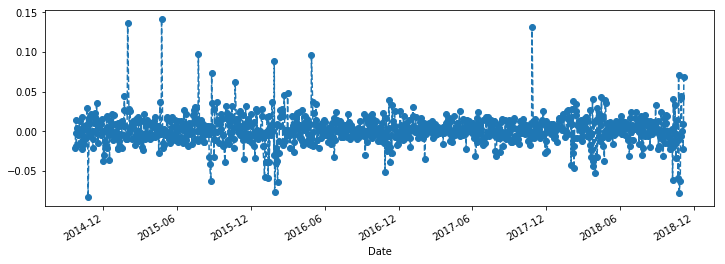

In [15]:
amazon2014['daily_return'].plot(figsize=(12,4),linestyle='--',marker='o')

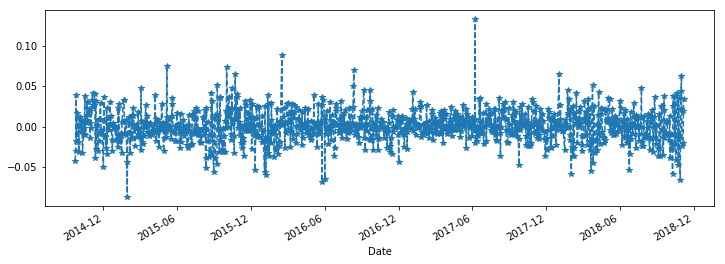

In [16]:
alibaba['daily_return'].plot(figsize=(12,4),linestyle='--',marker='*')

* 两家股价皆有涨有跌

## 直方图

d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'BABA')

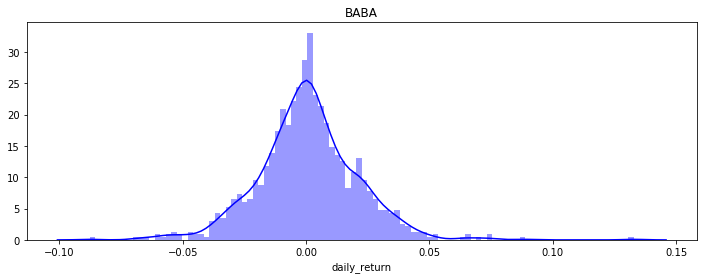

In [19]:
plt.figure(figsize=(12,4))
sns.distplot(alibaba['daily_return'].dropna(),bins = 100,color='b')
plt.title('BABA')

d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'AMZN')

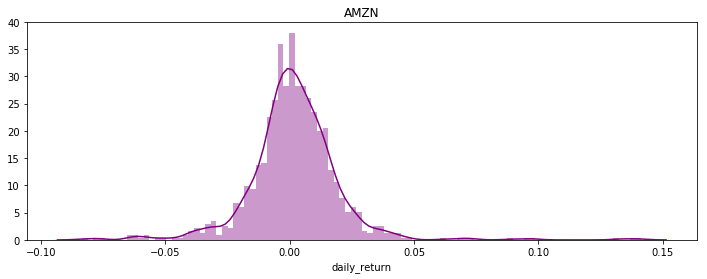

In [20]:
plt.figure(figsize=(12,4))
sns.distplot(amazon2014['daily_return'].dropna(),bins = 100,color='purple')
plt.title('AMZN')